### Load prediction data

In [5]:
import pandas as pd
predictions = pd.read_csv("./data/predictions.csv")
predictions.head()

,label,predGbt,predReg
0,0,0.002881,0.000038
1,0,0.003244,0.001715
2,0,0.011212,0.000592
3,0,0.035817,0.002219
4,0,0.004102,0.000024


### Roc construction

In [6]:
def rocPoints(classifier):
    positives = predictions[predictions.label == 1].shape[0]
    negatives = predictions[predictions.label == 0].shape[0]
    fprPoints = [0]
    tprPoints = [0]
    sortedPred = predictions[classifier].sort_values(ascending = False)
    for p in sortedPred:
        aboveThreshold = predictions[predictions[classifier] >= p].label # get part of df above p
        tpr = aboveThreshold[aboveThreshold == 1].shape[0] / float(positives)
        fpr = aboveThreshold[aboveThreshold == 0].shape[0] / float(negatives)
        fprPoints.append(fpr)
        tprPoints.append(tpr)
    return fprPoints, tprPoints

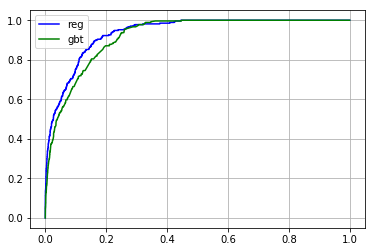

In [7]:
fpr_reg, tpr_reg =  rocPoints("predReg")
fpr_gbt, tpr_gbt =  rocPoints("predGbt")

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

### Roc from library

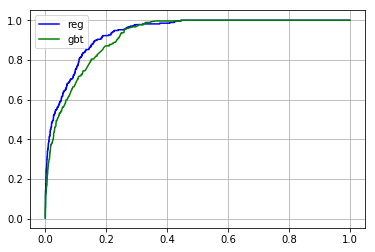

In [8]:
from sklearn.metrics import roc_curve
fpr_reg, tpr_reg, _ =  roc_curve(predictions["label"], predictions["predReg"])
fpr_gbt, tpr_gbt, _ =  roc_curve(predictions["label"], predictions["predGbt"])

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

### AUC Calculation

In [21]:
# doing it the numpy way
import numpy as np
from numpy import trapz

y = np.array(tpr_reg)
x = np.array(fpr_reg)

# Compute the area using the composite trapezoidal rule.
trapz(y, x)

0.9362552153597735

In [18]:
# doing it the sklearn way
from sklearn.metrics import auc
auc(fpr_reg, tpr_reg)

0.9362552153597735